<a href="https://colab.research.google.com/github/Khalil-Salama/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title:(Prediction of Product Sales)

- Auther: Khalil Salama

## Project Overview

    This project is sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

## Load and Inspect Data

*Mount Google drive*

In [327]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Import required packges*

In [328]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sales_pred=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/01-Fundamentals/Week03/Data/sales_predictions_2023.csv')
sales_pred

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


*Display summery information*

In [329]:
# The first five rows
sales_pred.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [330]:
# General information
sales_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


    After reviewing the information there is no obvoius changes, moving forword to checking and cleaning data


## Cleaning Data

*Number of rows*
- 8523

*Number of columns*
- 12

 *Data types for each variable*

In [331]:
sales_pred.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


**Duplicates**

*Finding duplicates*

In [332]:
# finding duplicates
sales_pred_duplicates=sales_pred.duplicated()
sales_pred_duplicates.sum()

np.int64(0)

    No duplicates where found, moving to check unique values

*Finding missing Values*

In [333]:
# Misssing values
null_sums=sales_pred.isna().sum()
null_columns= null_sums[null_sums>0]
null_columns

,0
Item_Weight,1463
Outlet_Size,2410


In [334]:
# Null sums percantge
null_sums_percentage=null_sums/len(sales_pred)
null_sums_percentage[null_sums_percentage>0]

,0
Item_Weight,0.171653
Outlet_Size,0.282764


<Axes: >

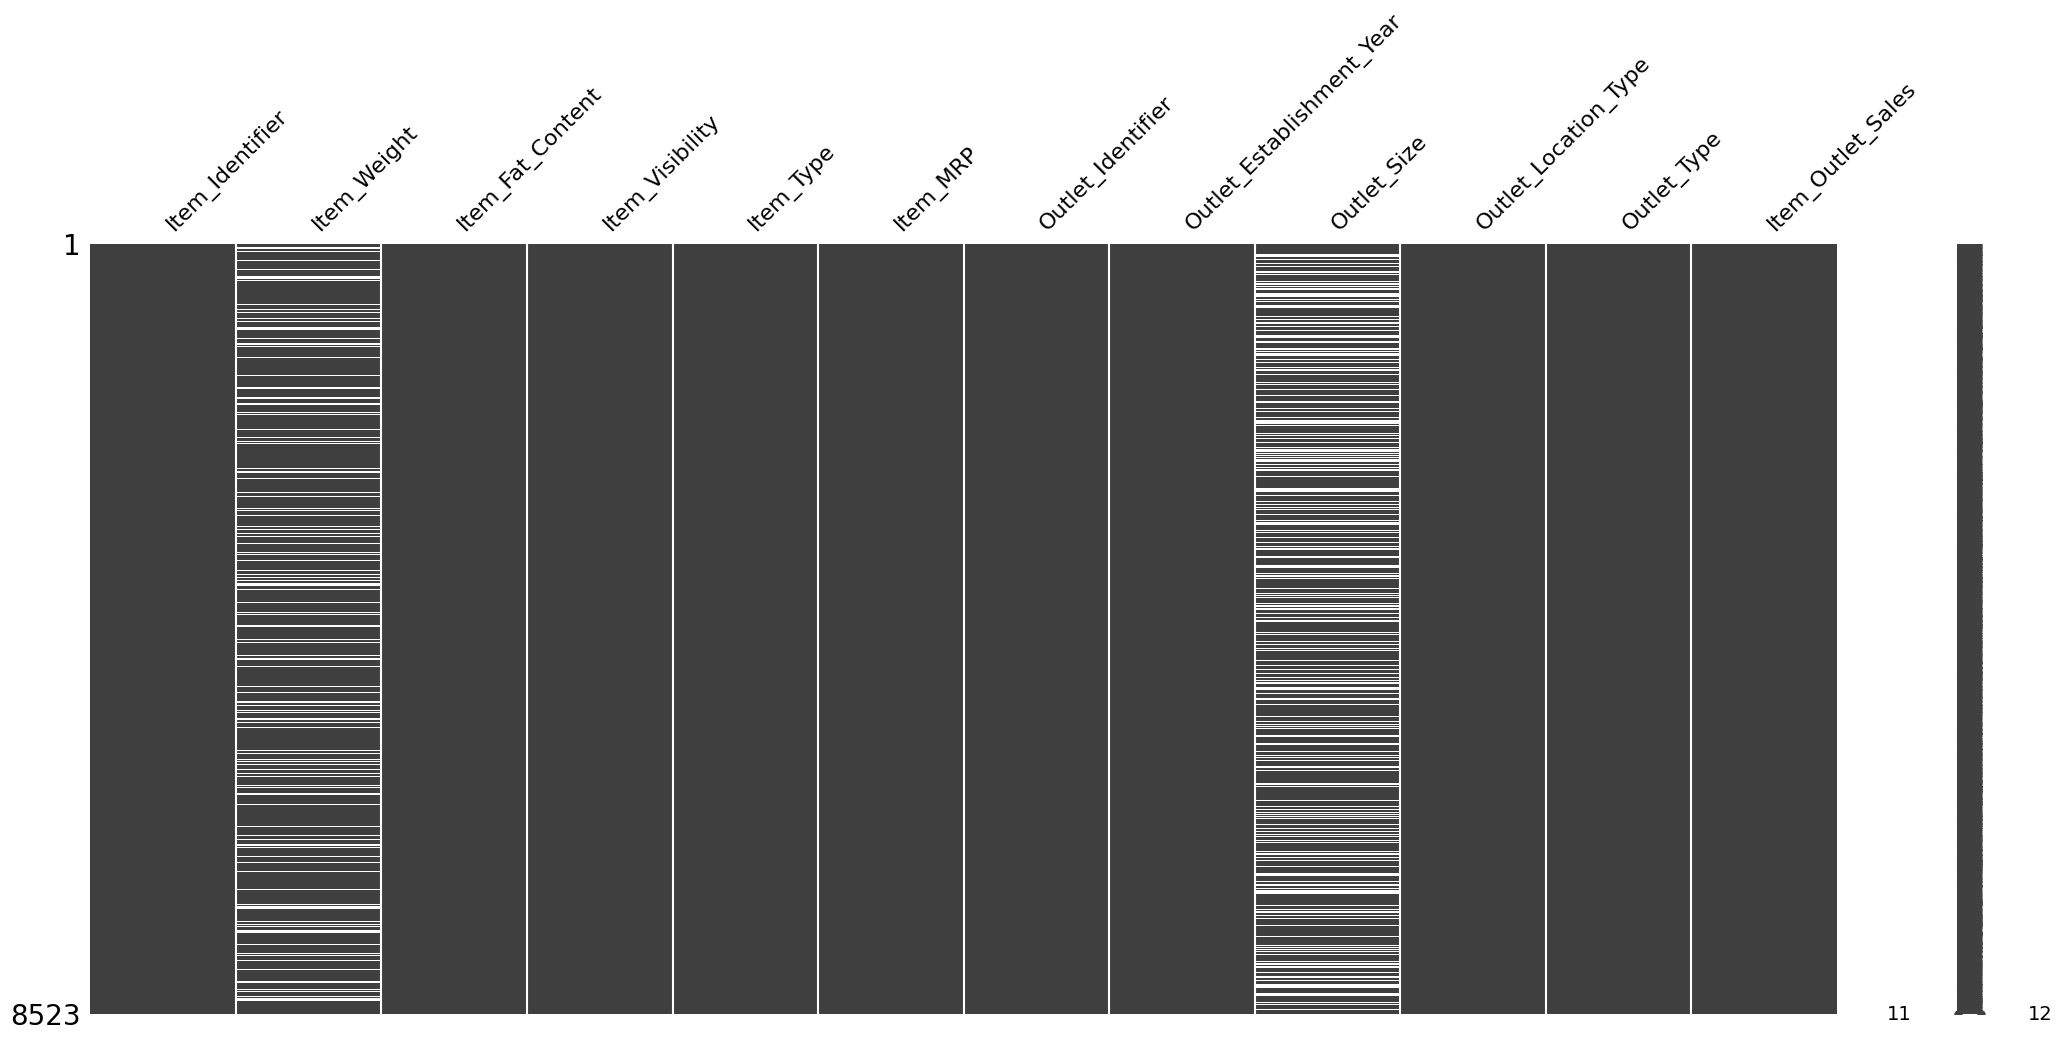

In [335]:
# Checking nulls with missingo
import missingno as msno
msno.matrix(sales_pred)

 *Adressing missing floats*


In [336]:
# Knowing the type of columns
sales_pred[null_columns.index].dtypes

,0
Item_Weight,float64
Outlet_Size,object


In [337]:
# adressing the nulls in Float
null_item_weight= sales_pred['Item_Weight'].isna()
null_item_weight.sum()

np.int64(1463)

In [338]:
# group by Item weight to check outlet sales change
sales_pred.groupby(['Item_Weight'])['Item_Outlet_Sales'].mean()

,Item_Outlet_Sales
Item_Weight,
4.555,1761.706800
4.590,1267.683200
4.610,1993.595429
4.615,4078.025000
4.635,2184.489800
...,...
21.000,1194.778100
21.100,1851.472306
21.200,2763.735800


    After looking at with Outlet Sales and since Item weight dosen't effect the value of outlet sales item. Decided to replace it with the mean figure -1


In [339]:
# replacing the null in item weight with -1
sales_pred['Item_Weight']=sales_pred['Item_Weight'].fillna(-1)
# confirming no nulls any more
sales_pred['Item_Weight'].isna().sum()

np.int64(0)

*Adressing missing strings*

In [340]:
# Checking the type of columns
sales_pred[null_columns.index].dtypes

,0
Item_Weight,float64
Outlet_Size,object


In [341]:
# grouping outlet sales by oulet size
sales_pred.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()

,Item_Outlet_Sales
Outlet_Size,
High,2298.995256
Medium,2681.603542
Small,1912.149161


In [342]:
sales_pred['Outlet_Size'].mode()

,Outlet_Size
0,Medium


    After looking at the Outlet Size values decided to replace the nulls with missing (the mode of this column)

In [343]:
# replacing null in Outlet size with Meduim
sales_pred['Outlet_Size']=sales_pred['Outlet_Size'].fillna('missing')
# confirming no nulls any more
sales_pred['Outlet_Size'].isna().sum()

np.int64(0)

*Finding and fixing any inconsistent categories of data.*


In [344]:
# filtering the string columns
all_string_columns=sales_pred.select_dtypes(include='object').columns
string_columns=[col for col in all_string_columns if col not in ['Item_Identifier','Outlet_Identifier']]
string_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [345]:
# making a for loop fpor the string columns
for col in string_columns:
  print(f"{col}:")
  print(sales_pred[col].value_counts(dropna=False))
  print("\n")

Item_Fat_Content:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Size:
Outlet_Size
Medium     2793
missing    2410
Small      2388
High        932
Name: count, dtype: int64


Outlet_Location_Type:
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64


Outlet_Type:
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3 

    Found inconsistancy in column Item_Fat_Contant

In [346]:
# fixing the inconsistancy in Item fat contant
sales_pred['Item_Fat_Content']=sales_pred['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

*Obtaining the summary statistics (min, max, mean) for each numerical column.*

In [347]:
# filtering the numeric columns
all_num_cols=sales_pred.select_dtypes(include='number').columns
all_num_cols
# removing outlet establishment year and item outlet sales from all num cols
num_cols=[col for col in all_num_cols if col not in ['Outlet_Establishment_Year','Item_Outlet_Sales']]
num_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [348]:
# Making a for loop for all numeric columns to get thier min, max, and mean
for col in num_cols:
  print(f"{col}:")
  print(f"min: {sales_pred[col].min()}")
  print(f"max: {sales_pred[col].max()}")
  print(f"mean: {sales_pred[col].mean()}")

Item_Weight:
min: -1.0
max: 21.35
mean: 10.478936407368296
Item_Visibility:
min: 0.0
max: 0.328390948
mean: 0.06613202877895108
Item_MRP:
min: 31.29
max: 266.8884
mean: 140.9927819781767


#Visualization the data set

**1) Histograms to view the distributions of numerical features in your dataset.**


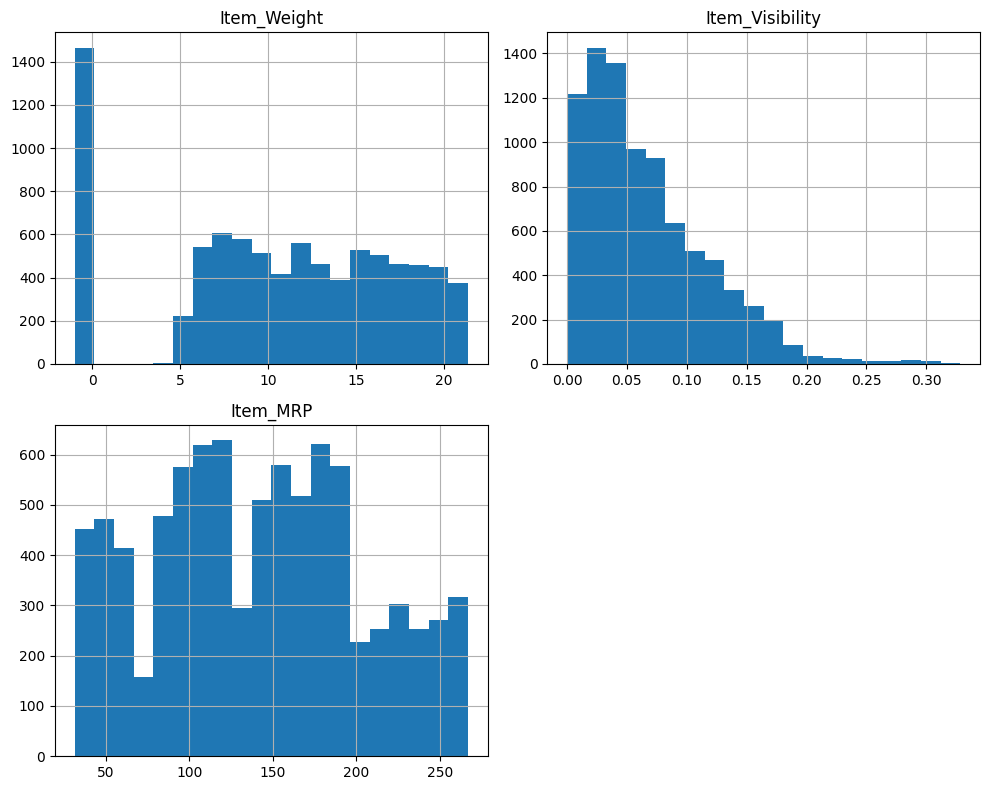

In [349]:
# Create a list of numeric columns with data
plottable_cols = [col for col in num_cols if pd.api.types.is_numeric_dtype(sales_pred[col]) and sales_pred[col].notna().any()]

# Determine the number of rows and columns for the subplots
n_cols = 2
n_rows = (len(plottable_cols) + n_cols - 1) // n_cols

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4)) # Adjust figure size based on number of rows

# Flatten the axes array for easy iteration if there's more than one row
if n_rows > 1:
    axes = axes.flatten()
else:
    # If there's only one row, axes is not a 2D array, so handle it differently
    if n_cols > 1:
        axes = axes
    else:
        # If there's only one plot, axes is just a single axis object
        axes = [axes]


# Plot histograms for the plottable columns
for i, col in enumerate(plottable_cols):
    ax = axes[i]
    sales_pred[col].hist(bins=20, ax=ax)
    ax.set_title(col)

# If there are fewer plots than total axes, turn off the remaining axes
if len(plottable_cols) < len(axes):
    for i in range(len(plottable_cols), len(axes)):
        axes[i].axis('off')


fig.tight_layout()
plt.show()


*We notice that the fastest moving items are:*
- Items weight below 0
- Items with visiblity below 0.05
- Items with MRP between 90, 130 and between 140, 195

**2) Boxplots to view statistical summaries of numerical features in your dataset.**

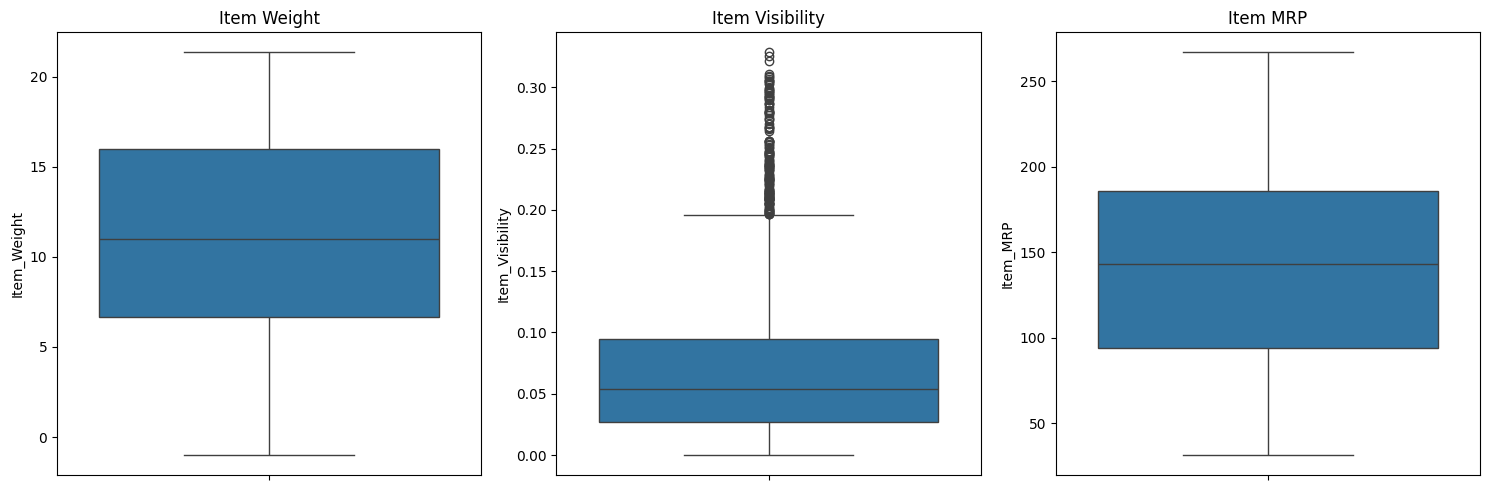

In [350]:
# creating a boxplot for items weight, items visiblity and MRP
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Plot boxplot for Item_Weight on the first axis
sns.boxplot(y=sales_pred['Item_Weight'], ax=axes[0])
axes[0].set_title('Item Weight')
# Plot boxplot for Item_Visibility on the second axis
sns.boxplot(y=sales_pred['Item_Visibility'], ax=axes[1])
axes[1].set_title('Item Visibility')
# Plot boxplot for Item_MRP on the third axis
sns.boxplot(y=sales_pred['Item_MRP'], ax=axes[2])
axes[2].set_title('Item MRP')
fig.tight_layout()
plt.show()

*we notice the following*
- The item weight and MRP are normally distributed nothing odd
- The item visibilty needs more analysis because most of the items have low visibilty and there are many outliers (very high visibility)

**3) Countplots to view the frequency of each class of categorial features in your dataset.**

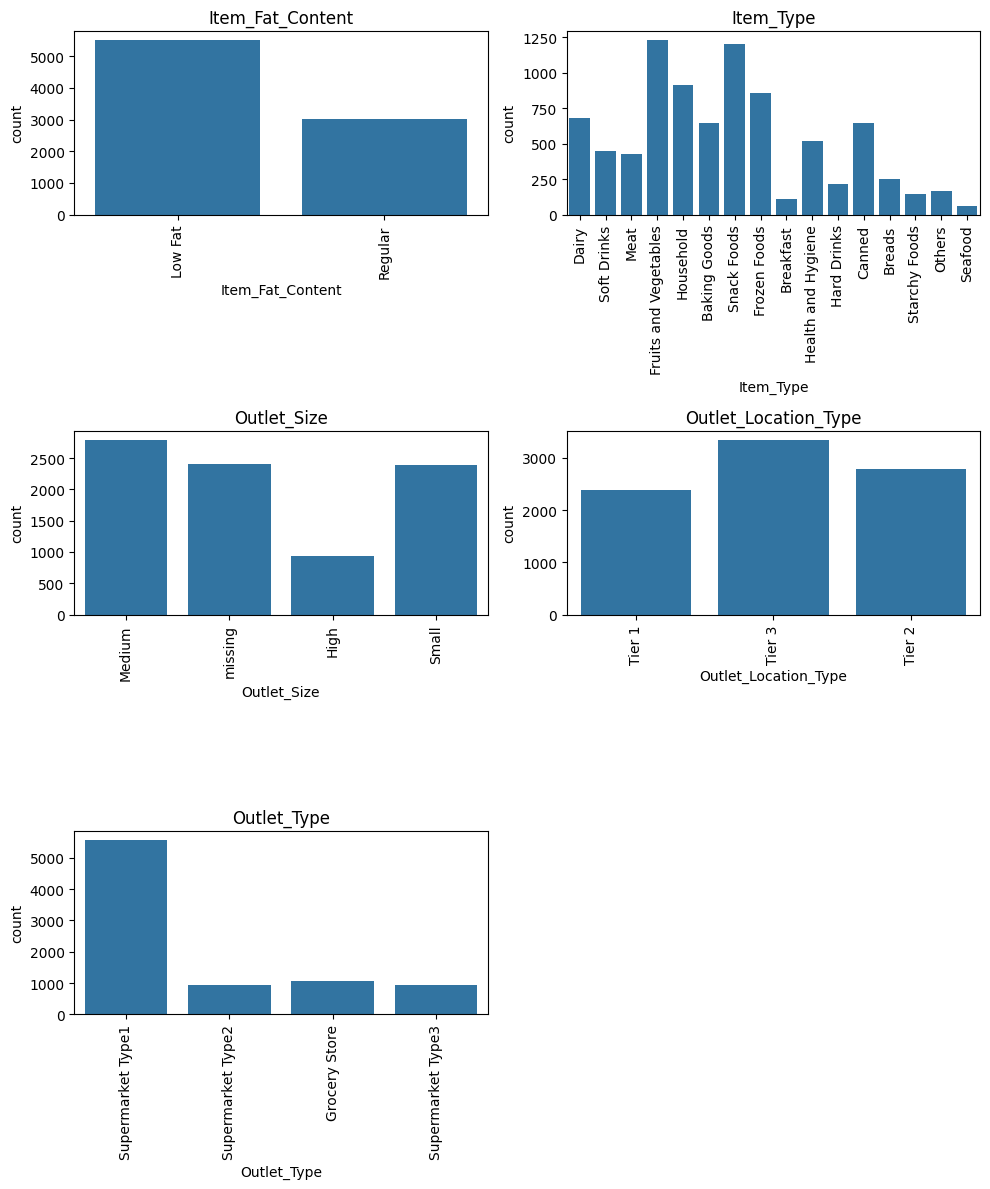

In [351]:
# creat countplots for categorial features for cat_cols
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
# Determine the number of rows and columns for the subplots
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4))

# Flatten the axes array for easy iteration if there's more than one row
if n_rows > 1:
    axes = axes.flatten()
else:
    # If there's only one row, axes is not a 2D array, so handle it differently
    if n_cols > 1:
        axes = axes
    else:
        # If there's only one plot, axes is just a single axis object
        axes = [axes]

# Plot countplots for the categorical columns
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(data=sales_pred, x=col, ax=ax) # Using x for vertical bars
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=90); # Rotate x-axis labels

# If there are fewer plots than total axes, turn off the remaining axes
if len(categorical_cols) < len(axes):
    for i in range(len(categorical_cols), len(axes)):
        axes[i].axis('off')

fig.tight_layout()
plt.show();

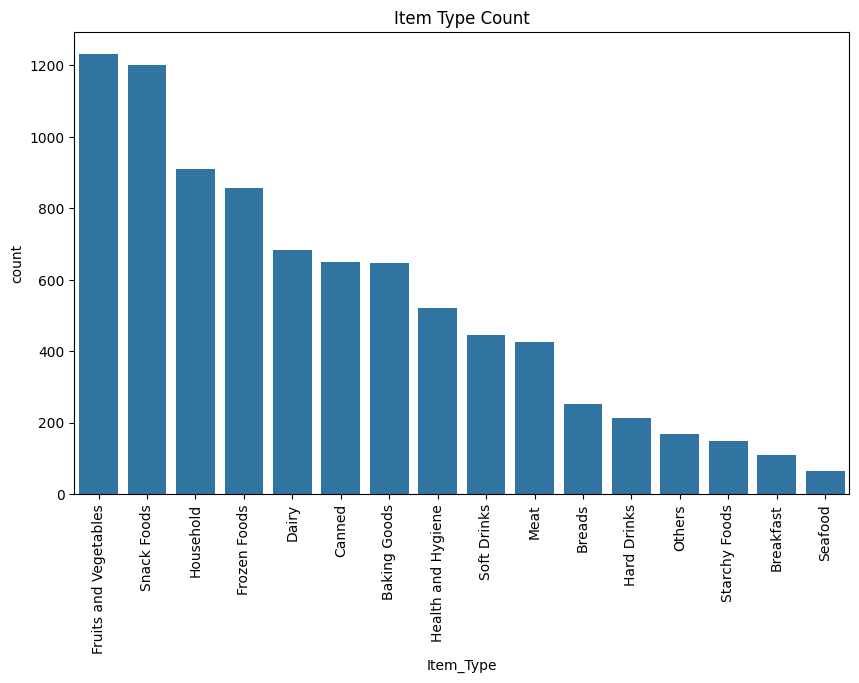

In [352]:
# recalling a countplot for Item type only with sorting
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_pred, x='Item_Type', order=sales_pred['Item_Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Item Type Count')
plt.show()
plt;

*We notice that:*
- Low fat items are double the volume of regular fat
- The data covers small and meduim outlets much more than high outlets
- The data covers supermarket type 1 more than the rest types

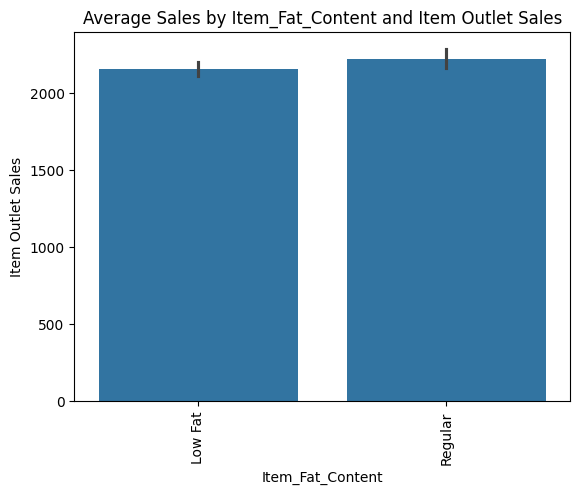

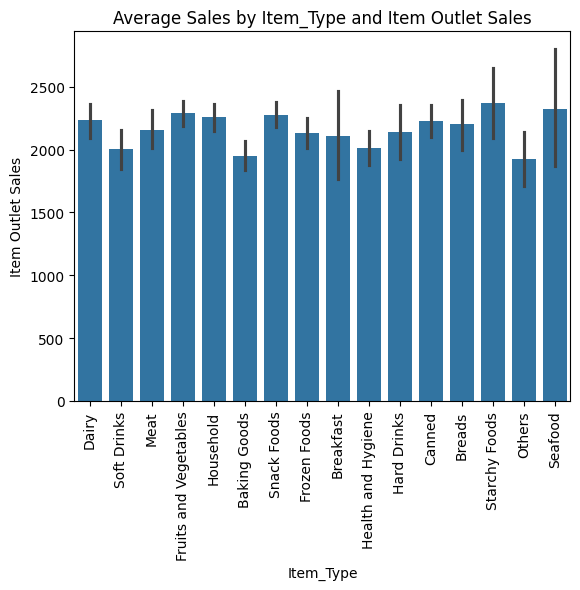

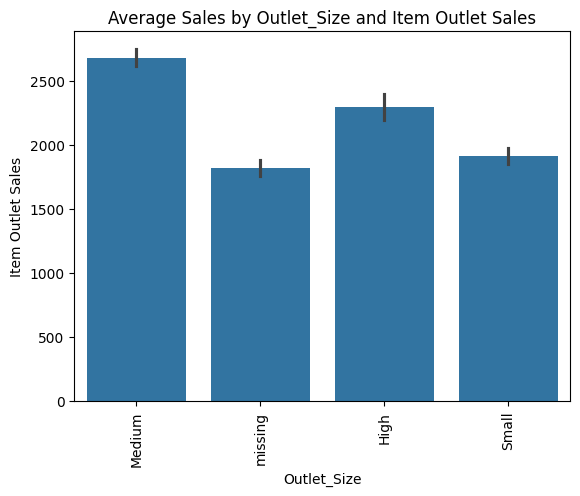

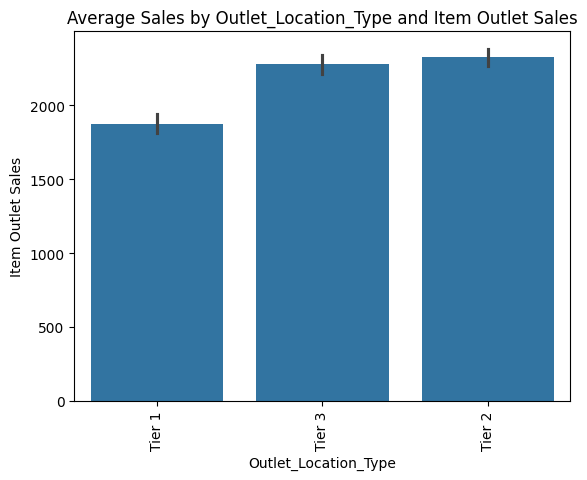

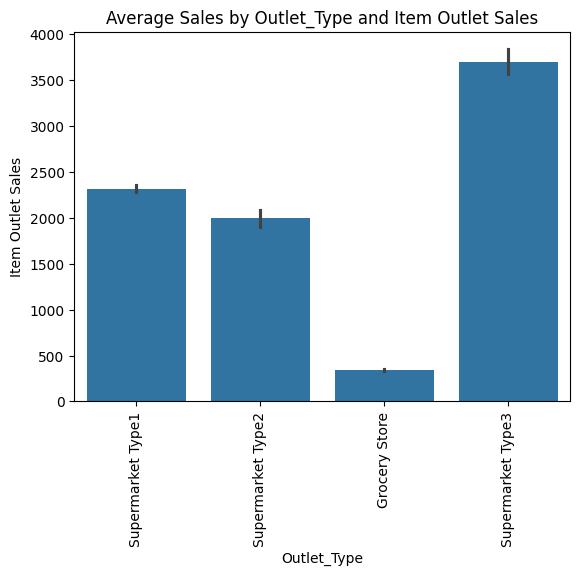

In [353]:
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in categorical_cols:
    sns.barplot(data=sales_pred, x=col, y='Item_Outlet_Sales')
    plt.title(f'Average Sales by {col} and Item Outlet Sales')
    plt.xlabel(col)
    plt.ylabel('Item Outlet Sales')
    plt.xticks(rotation=90) # Rotate x-axis labels for better readability if needed
    plt.show()

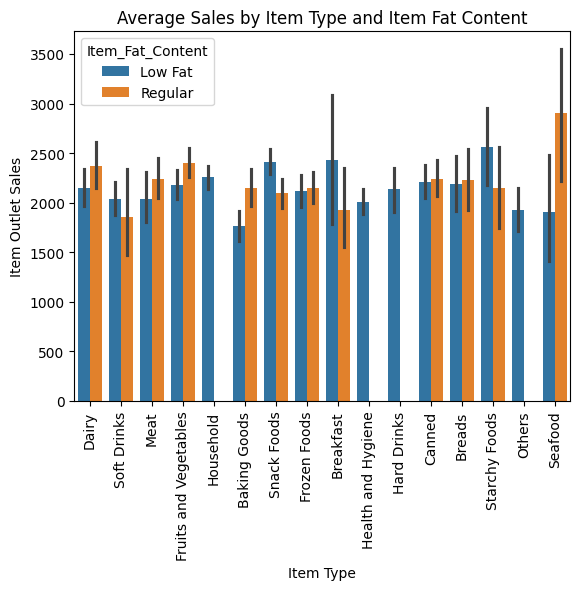

In [354]:
sns.barplot(data=sales_pred, x='Item_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content')
plt.title('Average Sales by Item Type and Item Fat Content')
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=90)
plt.show()

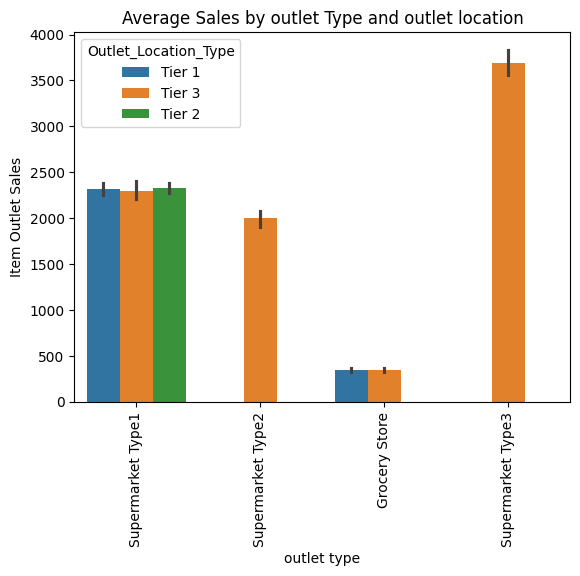

In [355]:
sns.barplot(data=sales_pred, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type')
plt.title('Average Sales by outlet Type and outlet location')
plt.xlabel('outlet type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=90)
plt.show()

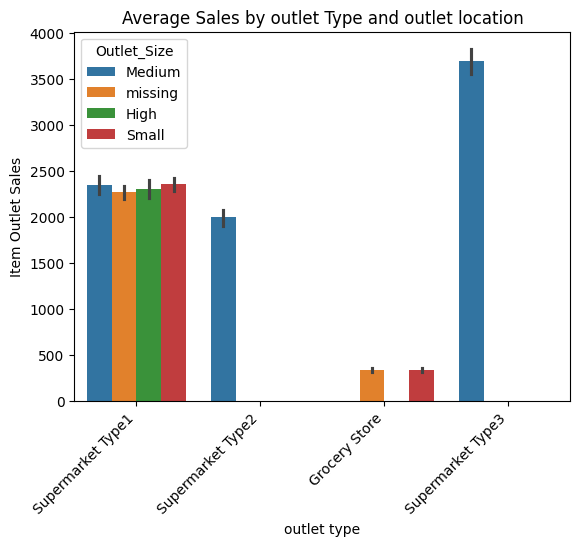

In [356]:
sns.barplot(data=sales_pred, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size')
plt.title('Average Sales by outlet Type and outlet location')
plt.xlabel('outlet type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

*We can tellfrom the categorial columns analysis that*
- Each Item type sales vary a little between Food with low fat and reguler fat but nothning significant except with seafood.
- Regarding the location Supermarket type 3, tier 3 meduim size have the highest results

**4) Heatmap to view the correlation between features.**

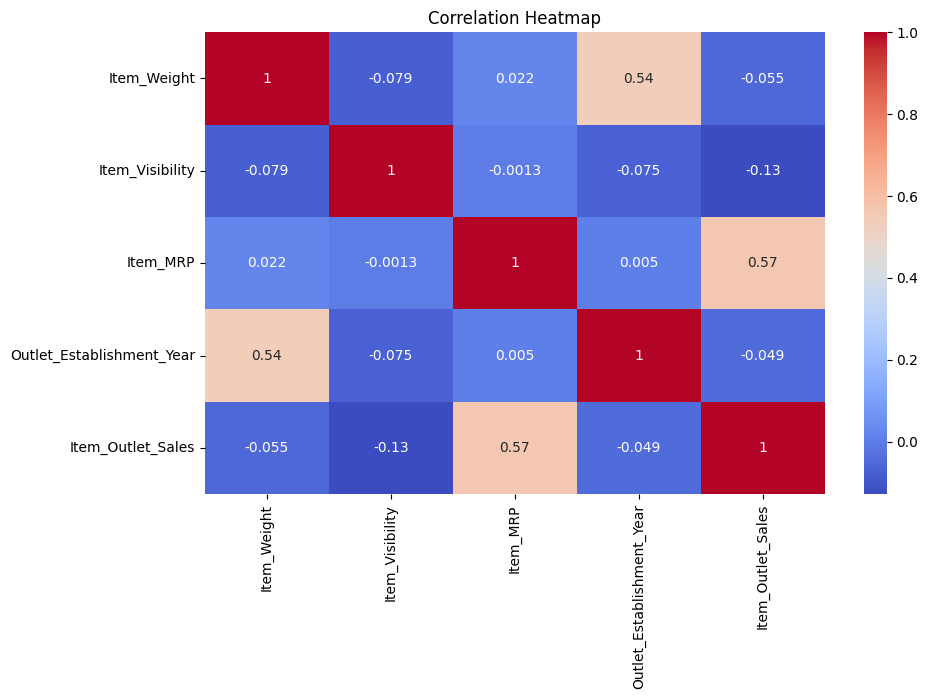

In [357]:
# creating a heat map with annots
all_num_cols=sales_pred.select_dtypes(include='number').columns
all_num_cols
plt.figure(figsize=(10, 6))
sns.heatmap(sales_pred[all_num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

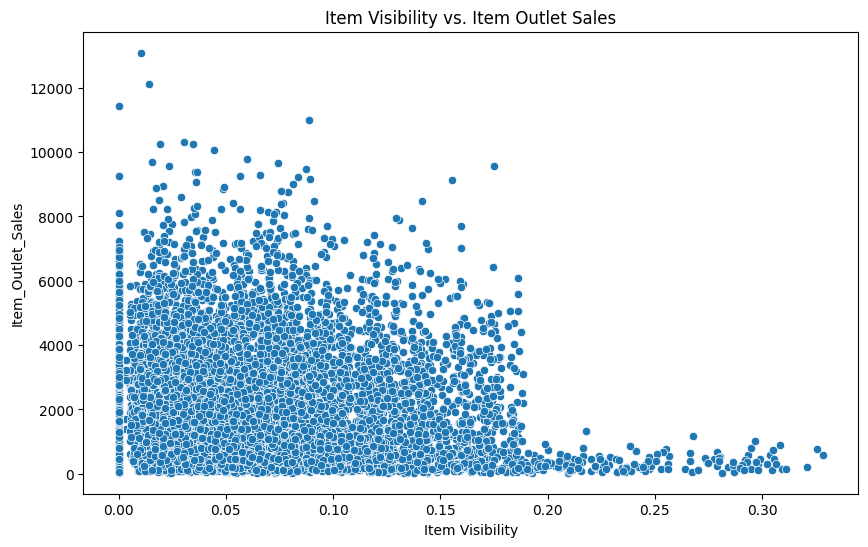

In [358]:
# a scatter plot to check visability and item outlet sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_pred, x='Item_Visibility', y='Item_Outlet_Sales')
plt.title('Item Visibility vs. Item Outlet Sales')
plt.xlabel('Item Visibility');




Text(0.5, 0, 'Item MRP')

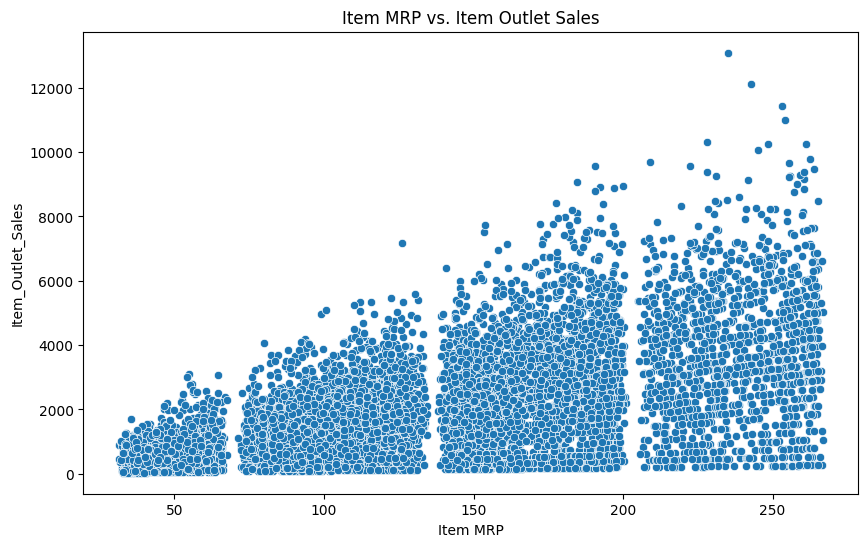

In [359]:
# a scatter plot to check MRP with Item outlet sale
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_pred, x='Item_MRP', y='Item_Outlet_Sales')
plt.title('Item MRP vs. Item Outlet Sales')
plt.xlabel('Item MRP')

*There is no strong relation between them and Item outlet sales*

# Removing place holders and replacing them with null values


In [360]:
sales_pred['Item_Weight'].value_counts()

,count
Item_Weight,
-1.000,1463
12.150,86
17.600,82
13.650,77
11.800,76
...,...
5.210,2
9.420,1
7.685,1


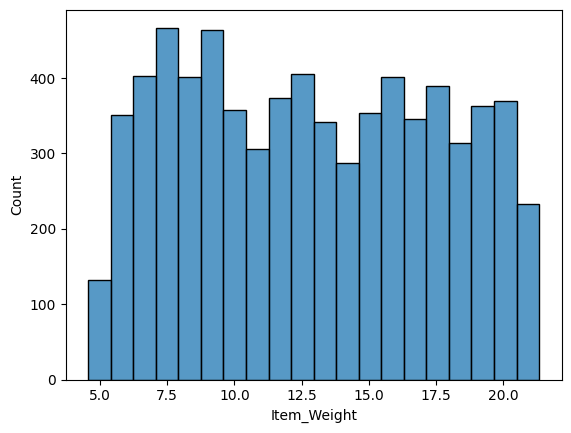

In [361]:
# Replacing -1 with nan
sales_pred['Item_Weight']=sales_pred['Item_Weight'].replace(-1,np.nan)
sales_pred['Item_Weight'].value_counts()
sns.histplot(sales_pred['Item_Weight']);

In [362]:
# Replacing missing with null value in Outlet_size
sales_pred['Outlet_Size']=sales_pred['Outlet_Size'].replace('missing',np.nan)
sales_pred['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


## Exploratory Data Analysis

**Dictionary feature definitions**

Variable Name	Description

Item_Identifier: Product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low-fat or regular

Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product

Item_Type:	The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier:	Store ID

Outlet_Establishment_Year:	The year in which store was established

Outlet_Size:	The size of the store in terms of ground area covered

Outlet_Location_Type:	The type of area in which the store is located

Outlet_Type:	Whether the outlet is a grocery store or some sort of supermarket

Item_Outlet_Sales:	Sales of the product in the particular store. This is the target variable to be predicted.

1) Create a univariate visualization showing the distribution of values/categories.

In [363]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy() # Use the passed-in dataframe 'df'
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)

  # Get the bars from the plot
  bars = ax.patches

  # Assign a unique color to each bar
  for i, bar in enumerate(bars):
      bar.set_color(plt.cm.viridis(i / len(bars))) # Using a colormap for different colors

  # Get current tick locations and labels
  current_ticks = ax.get_xticks()
  current_labels = ax.get_xticklabels()
  # Set new tick labels with rotation
  ax.set_xticks(current_ticks) # Set the ticks explicitly
  ax.set_xticklabels(current_labels, rotation=45, ha='right') # Then set the labels

  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

  # Test our function with the print statements
# explore_categorical(df, 'Alley');

In [364]:
# calling categorial columns
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
categorical_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

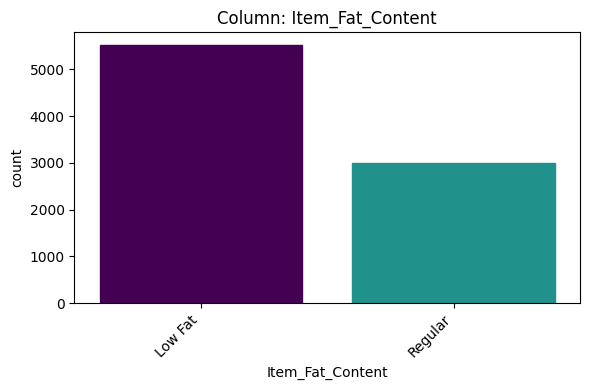

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [365]:
explore_categorical(temp_df, 'Item_Fat_Content');

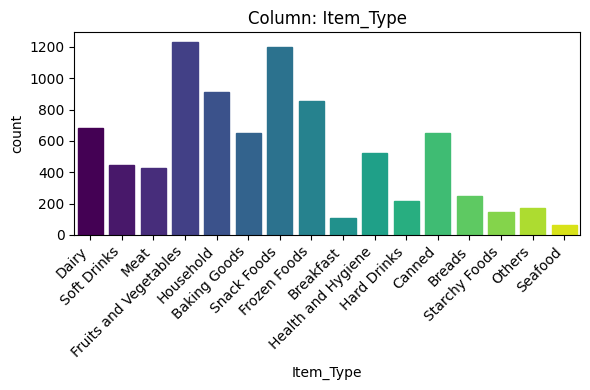

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [366]:
explore_categorical(temp_df, 'Item_Type');

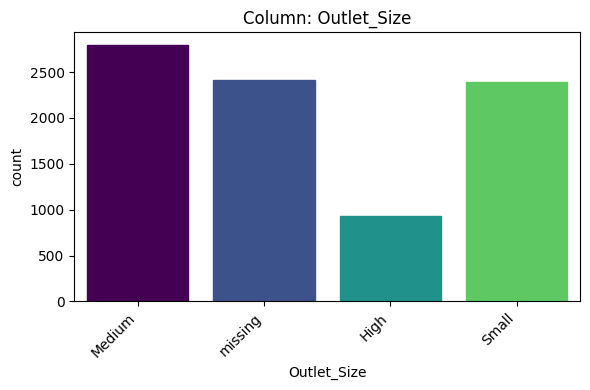

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [367]:
explore_categorical(temp_df, 'Outlet_Size');

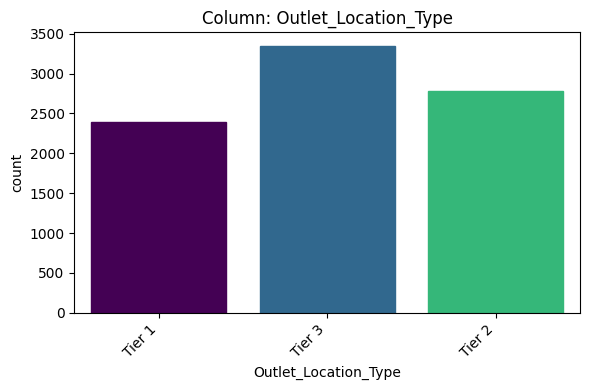

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [368]:
explore_categorical(temp_df, 'Outlet_Location_Type');

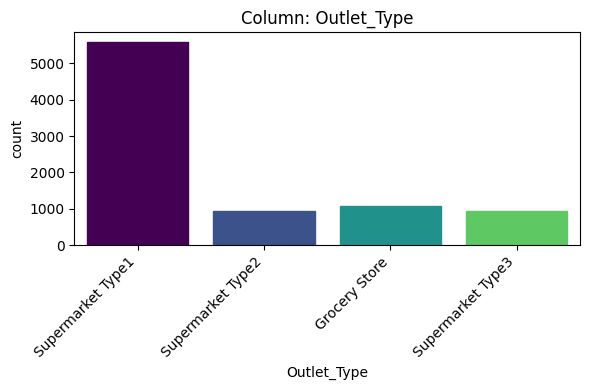

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [369]:
explore_categorical(temp_df, 'Outlet_Type');

In [370]:
# Calling numeric columns
all_num_cols=sales_pred.select_dtypes(include='number').columns
all_num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [371]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# explore numaric feature

def explore_numeric(sales_pred, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=sales_pred, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=sales_pred, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = sales_pred[x].isna().sum()
  null_perc = null_count/len(sales_pred)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

  # Test the function
# explore_numeric(sales_pred, "Lot Frontage")

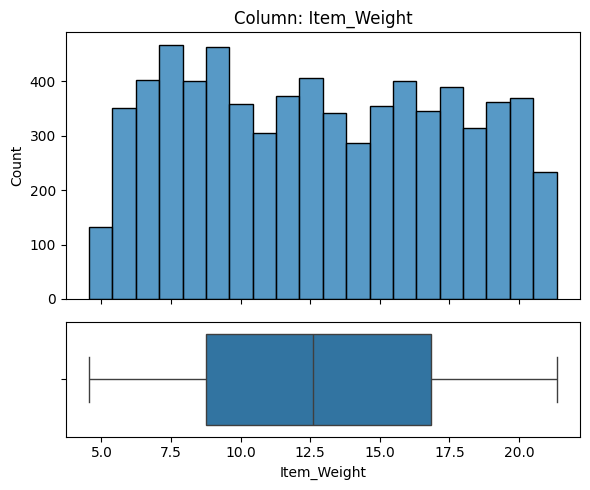

- NaN's Found: 1463 (17.17%)


In [372]:
explore_numeric(sales_pred, x="Item_Weight")

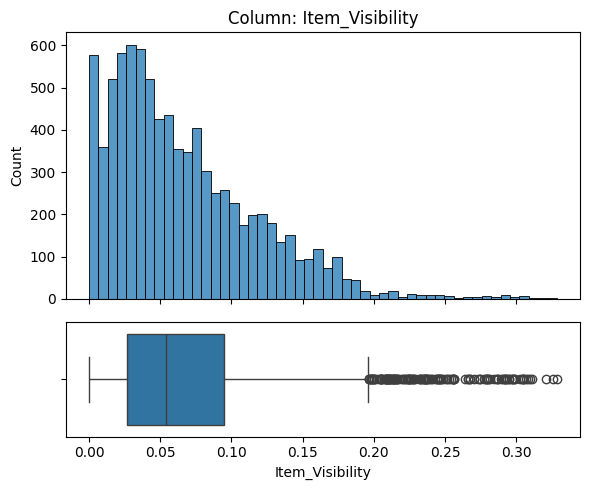

- NaN's Found: 0 (0.0%)


In [373]:
explore_numeric(sales_pred, "Item_Visibility")

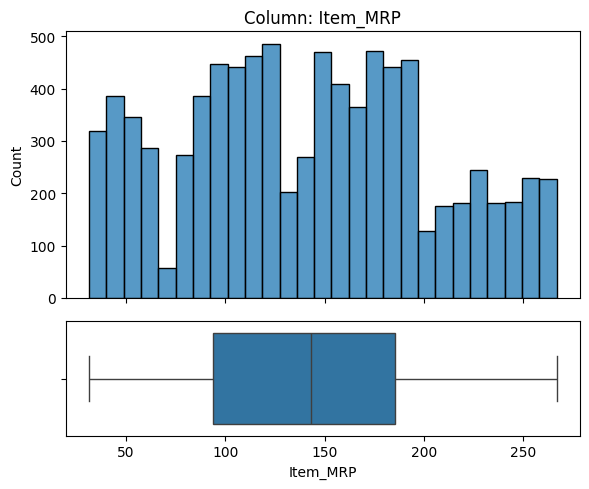

- NaN's Found: 0 (0.0%)


In [374]:
explore_numeric(sales_pred, "Item_MRP")

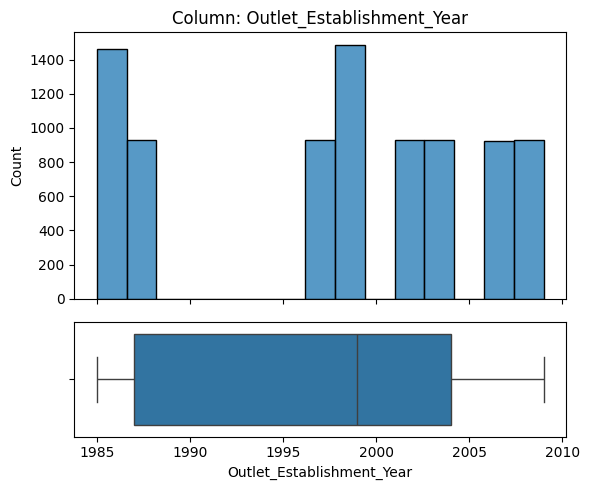

- NaN's Found: 0 (0.0%)


In [375]:
explore_numeric(sales_pred, "Outlet_Establishment_Year")

2) Create a multivariate visualization plotting each feature vs. the target.

In [385]:
# Final version of function
def plot_categorical_vs_target(sales_pred, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = sales_pred.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

# fig, ax = plot_categorical_vs_target(df, x='Exter Qual', order=qual_order)

<ipython-input-385-6b9e5405592f>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


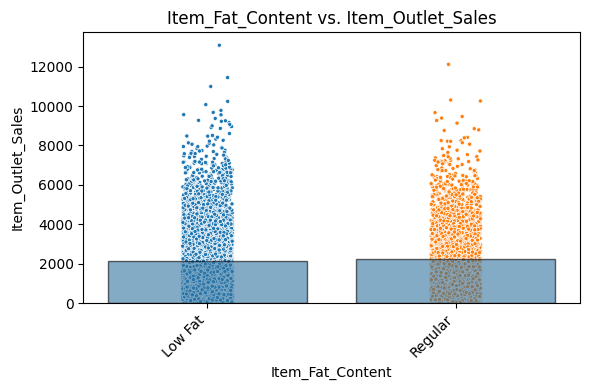

In [386]:
fig, ax = plot_categorical_vs_target(sales_pred, x='Item_Fat_Content')

<ipython-input-385-6b9e5405592f>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


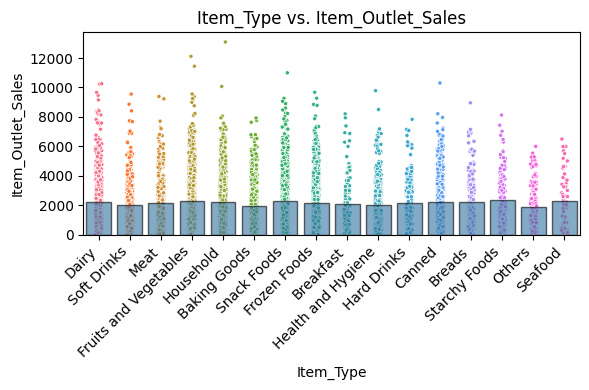

In [390]:
fig, ax = plot_categorical_vs_target(sales_pred, x='Item_Type')

<ipython-input-385-6b9e5405592f>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


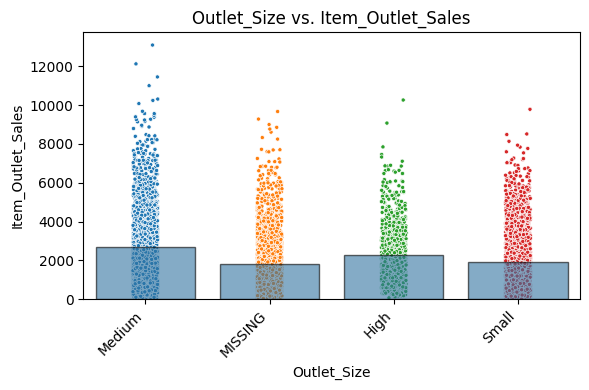

In [391]:
fig, ax = plot_categorical_vs_target(sales_pred, x='Outlet_Size')

<ipython-input-385-6b9e5405592f>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


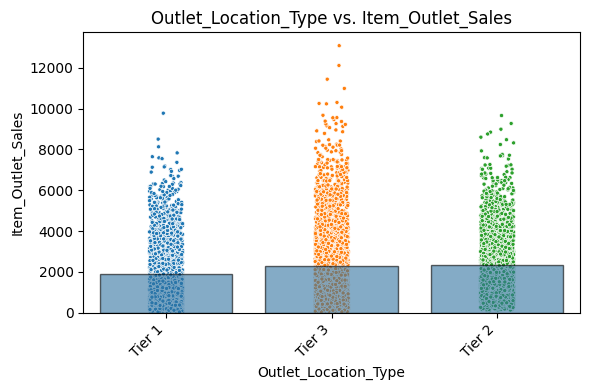

In [392]:
fig, ax = plot_categorical_vs_target(sales_pred, x='Outlet_Location_Type')

<ipython-input-385-6b9e5405592f>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


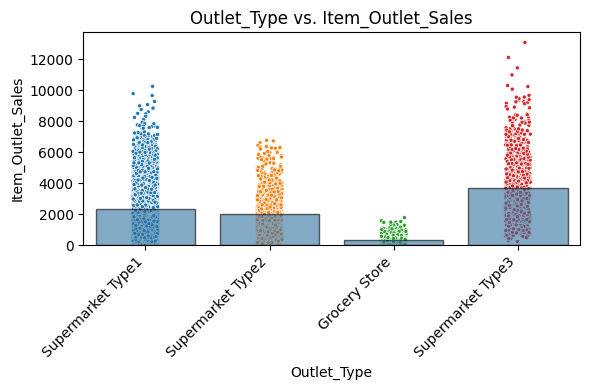

In [393]:
fig, ax = plot_categorical_vs_target(sales_pred, x='Outlet_Type')

In [401]:
# Add **kwargs as keyword when defining function
# Include **kwargs in the sns.regplot() within the function

def plot_numeric_vs_target(sales_pred, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = sales_pred[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  # Change 'lw' to 'linewidths' in the scatter_kws dictionary
  scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
  sns.regplot(data=sales_pred, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax
  # Test the function with two kwargs from the regplot function

#fig, ax = plot_numeric_vs_target(df, "Living Area Sqft", color = 'red', truncate = False)

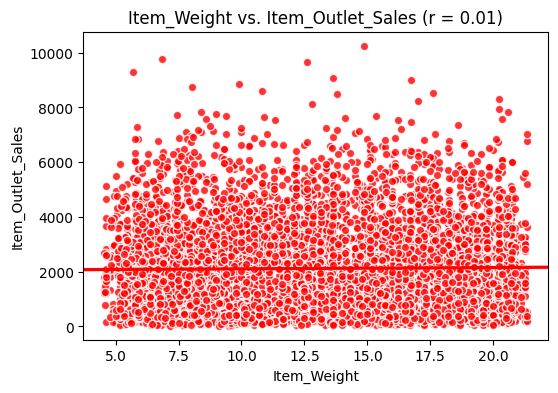

In [403]:
fig, ax = plot_numeric_vs_target(sales_pred, "Item_Weight", color = 'red', truncate = False)

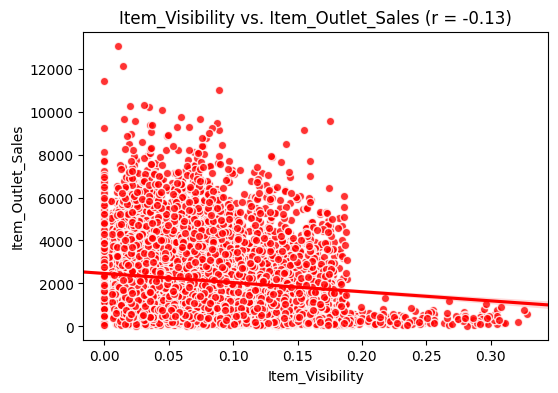

In [404]:
fig, ax = plot_numeric_vs_target(sales_pred, "Item_Visibility", color = 'red', truncate = False)

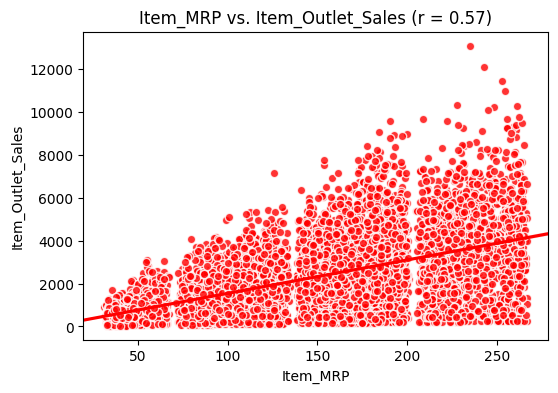

In [405]:
fig, ax = plot_numeric_vs_target(sales_pred, "Item_MRP", color = 'red', truncate = False)

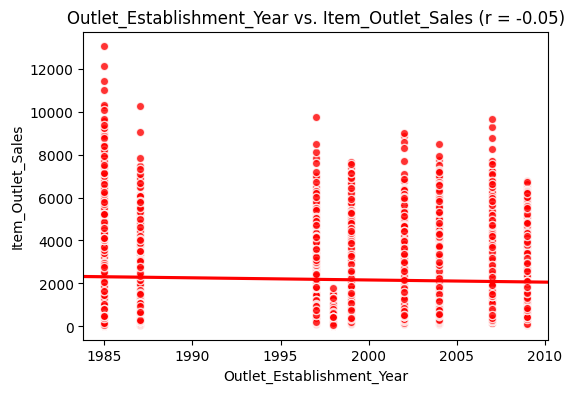

In [406]:
fig, ax = plot_numeric_vs_target(sales_pred, "Outlet_Establishment_Year", color = 'red', truncate = False)